In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DTM TRAINING

In [11]:
import csv, time, random
from gensim.models import ldaseqmodel
from gensim import corpora
import pyLDAvis
import pandas as pd


if __name__ == "__main__":

    start_time = time.time()

    raw_corpus = []
    time_dic = {}
    time_slice = []

    # Read stop list data
    with open("C:\\Users\\Zh_uu\\PycharmProjects\\pythonProject11\\pyLDA-Dynamic-Topic-Models\\stop_word_list.txt", "r") as stop_list_file:
        stop_list_lines = stop_list_file.readlines()
        new_stop_list = []
        for stop_word in stop_list_lines:
            new_stop_list.append(stop_word.strip())
        stoplist = set(new_stop_list)
    print(stoplist)

    # Read doc data
    # TODO: replace the file name in following line with your data source
    with open("C:\\Users\\Zh_uu\\PycharmProjects\\pythonProject11\\pyLDA-Dynamic-Topic-Models2\\filtered_complaints.csv", "r") as csvfile_in:
        csv_reader = list(csv.reader(csvfile_in))  
        csv_header = csv_reader[0]  
        data_rows = csv_reader[1:]  

        for row in data_rows:
            row[1] = pd.to_datetime(row[1])
            # month_time = row[1].strftime('%Y')
            year_quarter = f"{row[1].year}-Q{row[1].quarter}"
            raw_corpus.append(row[2])
            if year_quarter in time_dic:
                time_dic[year_quarter] += 1
            else:
                time_dic[year_quarter] = 1
    print(time_dic)

        # Count doc every year
    for month_key in sorted(time_dic.keys()):
        time_slice.append(time_dic[month_key])
    
    # Lowercase each document, split it by white space and filter out stopwords
    texts = [[word for word in document.lower().split() if word not in stoplist]
            for document in raw_corpus]
    print(texts)

    # Count word frequencies
    from collections import defaultdict
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1

    # Only keep words that appear more than once
    processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
    dictionary = corpora.Dictionary(processed_corpus)
    bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
    print(time_slice)

{'take', 'usc', 'inquiry', 'call', "''", 'person', 'ask', 'provide', 'send', ';', 'record', 'may', 'xx/xx/xxxx.', 'amount', 'xx/xx/,', 'consumer', 'shall', 'letter', "'re", 'one', 'ZT', 'company', 'make', 'list', "'s", 'also', 'year', 'code', '$', '602', 'act', 'state', 'name', ':', 'phone', 'able', '000', 'contact', 'loans', 'number', 'need', 'xxxxxxxx', 'write', "'ll", 'loans.', 'without', 'give', '15', "'ve", 'follow', 'about', 'say', "'d", 'address', '--', 'would', 'please', 'loan.', '(', "'t", 'receive', 'collection', 'loan', 'bureau', 'a', 'bank', 'show', ').', 'issue', 'file', 'dispute', 'xx/', '{$.}', 'agency', 'use', 'tell', '"', 'never', 'know', 'complaint', 'month', 'xxx', 'request', 'b', 'furnish', 'still', 'money', 'well', ')', '1', 'section', 'xx/xx/xxxx,', 'day', 'xxxx', 'ZZ', 'provider', 'open', 'xxxx/', 'back', '1681', 'right', 'get', 'u', 'go', 'date', 'xx/xx/xxxx', 'time', 'xx/xx/', '604', '".', '[', '2', "'m", "a's", 'item'}
{'2023-Q4': 2778, '2023-Q3': 1264, '2022-

In [ ]:
num_topics = 15
ldaseq =ldaseqmodel.LdaSeqModel(corpus=bow_corpus, time_slice=time_slice, id2word=dictionary, alphas=0.01, num_topics=num_topics, initialize='gensim', obs_variance=0.5, chain_variance=0.005, passes=10, random_state=None)
ldaseq.save('ldaseq_model15.pkl')

c:\Users\Zh_uu\miniconda3\envs\pythonProject8\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\Zh_uu\miniconda3\envs\pythonProject8\lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)
c:\Users\Zh_uu\miniconda3\envs\pythonProject8\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\Zh_uu\miniconda3\envs\pythonProject8\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: invalid value encountered in scalar divide
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
c:\Users\Zh_uu\miniconda3\envs\pythonProject8\lib\site-packages\gensim\models\ldaseqmodel.py:1480: RuntimeWarning: i

In [7]:
ldaseq = ldaseqmodel.LdaSeqModel.load('ldaseq_model15.pkl')

# Output topic every year
word_num = 20
out_path = "C:\\Users\\Zh_uu\\PycharmProjects\\pythonProject11\\pyLDA-Dynamic-Topic-Models\\topic15"
with open(out_path + ".csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    header = []
    for i in range(0, num_topics):
        header.append(("topic_" + str(i + 1)))
    writer.writerow(header)
    for j in range(0, len(time_slice)):
        writer.writerow(ldaseq.print_topics(j, word_num))

In [8]:
# Visualising Dynamic Topic Models
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=7, corpus=bow_corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)

print("\ndone @{}(s)\n".format(time.time() - start_time))

pyLDAvis.save_html(vis_dtm, "result15.html")


done @14229.642860174179(s)



In [5]:
# Visualising Dynamic Topic Models
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=0, corpus=bow_corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)

print("\ndone @{}(s)\n".format(time.time() - start_time))

pyLDAvis.save_html(vis_dtm, "result0.html")


done @3240.202927350998(s)



In [6]:
import plotly.graph_objs as go
import plotly.offline as pyo
import numpy as np

num_topics = ldaseq.num_topics
num_time_slices = ldaseq.num_time_slices

topic_evolution_data = {}

for topic_id in range(num_topics):
    topic_evolution_data[topic_id] = {
        "frequency": [],
        "keywords": []
    }
    for time in range(num_time_slices):
        topic_probabilities = ldaseq.doc_topics(time)
        
        topic_prob = topic_probabilities[topic_id]
        
        topic_evolution_data[topic_id]["frequency"].append(topic_prob)
        
        topic_keywords = ldaseq.print_topic(topic_id, time)
        keywords_only = [word for word, _ in topic_keywords]
        topic_evolution_data[topic_id]["keywords"].append(", ".join(keywords_only))

fig = go.Figure()

for topic_id, data in topic_evolution_data.items():
    hover_text = [f"Topic {topic_id + 1}<br>Words: {keywords}" for keywords in data["keywords"]]
    
    fig.add_trace(go.Scatter(
        x=list(range(num_time_slices)),
        y=data["frequency"],
        mode='lines+markers',
        name=f'Topic {topic_id + 1}',
        hovertext=hover_text, 
        hoverinfo="text"  
    ))

fig.update_layout(
    title='Topic Evolution Over Time',
    xaxis_title='Time Slice',
    yaxis_title='Topic Probability',
    hovermode='closest', 
    template='plotly_white'
)

pyo.plot(fig)


'temp-plot.html'

# Evaluation

In [8]:
from gensim.models import CoherenceModel


coherence_scores = []
for t in range(len(time_slice)):
    lda_time_t = ldaseq.dtm_coherence(time=t)
    coherence_model = CoherenceModel(topics=lda_time_t, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

print(f"Coherence Scores for all time slices: {coherence_scores}")


Coherence Scores for all time slices: [0.5503609317554465, 0.5503609317554465, 0.5505284226750142, 0.5538265967538283, 0.5549853372364412, 0.5488597972618257, 0.5566945392125534, 0.5539403513937634]


In [9]:
from gensim.models import CoherenceModel

ldaseq15 = ldaseqmodel.LdaSeqModel.load('ldaseq_model15.pkl')
coherence_scores = []
for t in range(len(time_slice)):
    lda_time_t = ldaseq15.dtm_coherence(time=t)
    coherence_model = CoherenceModel(topics=lda_time_t, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

print(f"Coherence Scores for all time slices: {coherence_scores}")

Coherence Scores for all time slices: [0.4553728533098317, 0.45042593669425585, 0.45224973434276083, 0.44806254362511505, 0.44989737740043856, 0.45207519501029475, 0.4490226427892045, 0.45465188577463805]


In [ ]:
def topic_diversity(ldaseq, time_slice, top_n_words=10):
    all_topics_words = []


    for t in range(len(time_slice)):
        lda_time_t = ldaseq.dtm_coherence(time=t)  
        topic_words = [topic[:top_n_words] for topic in lda_time_t]  
        all_topics_words.extend(topic_words)

    
    all_words = [word for topic in all_topics_words for word in topic]
    
    unique_words = set(all_words)
    total_words = len(all_words)

    diversity_score = len(unique_words) / total_words if total_words > 0 else 0
    return diversity_score

diversity_score = topic_diversity(ldaseq, time_slice)
print(f"Topic Diversity Score: {diversity_score:.4f}")




Topic Diversity Score: 0.1125


In [63]:
with open('complaint_topic_labels.csv', mode='r') as file:
    complaint_topic_labels = list(csv.reader(file))
manual_labels = [row[0] for row in complaint_topic_labels]
manual_labels

['2',
 '1',
 '1',
 '1',
 '1',
 '2',
 '4',
 '1',
 '4',
 '4',
 '1',
 '1',
 '4',
 '0',
 '0',
 '1',
 '2',
 '2',
 '4',
 '0',
 '2',
 '0',
 '4',
 '1',
 '1',
 '0',
 '1',
 '0',
 '4',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '4',
 '3',
 '3',
 '4',
 '4',
 '1',
 '1',
 '2',
 '1',
 '4',
 '0',
 '1',
 '3',
 '4',
 '0',
 '3',
 '1',
 '0',
 '1',
 '1',
 '1',
 '4',
 '0',
 '0',
 '1',
 '1',
 '4',
 '2',
 '2',
 '0',
 '0',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '3',
 '1',
 '0',
 '3',
 '1',
 '2',
 '1',
 '0',
 '1',
 '1',
 '0',
 '2',
 '3',
 '1',
 '0',
 '0',
 '0',
 '1',
 '3',
 '0',
 '0',
 '2',
 '1',
 '1',
 '1',
 '3',
 '2',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '4',
 '0',
 '1',
 '3',
 '4',
 '1',
 '1',
 '0',
 '1',
 '4',
 '0',
 '3',
 '2',
 '0',
 '2',
 '1',
 '3',
 '0',
 '4',
 '4',
 '2',
 '1',
 '4',
 '0',
 '1',
 '2',
 '1',
 '4',
 '1',
 '0',
 '4',
 '4',
 '4',
 '0',
 '4',
 '2',
 '4',
 '0',
 '1',
 '4',
 '2',
 '2',
 '0',
 '1',
 '1',
 '1',
 '2',
 '1',
 '1',
 '4',
 '1',
 '3',
 '2'

In [ ]:
import pandas as pd
from gensim.models import ldaseqmodel



num_docs = 5000  
num_time_slices = len(ldaseq.time_slice)


data = []


for doc_id in range(num_docs):

    doc_topics_over_time = ldaseq.doc_topics(doc_id)
    

    doc_data = {'Document': f'Document {doc_id + 1}'}
    for topic, topic_distribution in enumerate(doc_topics_over_time):
        doc_data[f'Topic {topic + 1}'] = topic_distribution
    data.append(doc_data)


df = pd.DataFrame(data)
df.set_index('Document', inplace=True)

df = df.drop('Document 3971', errors='ignore')

df['human_label']=manual_labels
print(df)


                Topic 1   Topic 2   Topic 3   Topic 4   Topic 5 human_label
Document                                                                   
Document 1     0.000154  0.000154  0.999385  0.000154  0.000154           2
Document 2     0.004878  0.980488  0.004878  0.004878  0.004878           1
Document 3     0.178989  0.000192  0.000192  0.441253  0.379374           1
Document 4     0.285387  0.463790  0.246108  0.004625  0.000089           1
Document 5     0.000830  0.000830  0.658179  0.339331  0.000830           1
...                 ...       ...       ...       ...       ...         ...
Document 4996  0.186300  0.000063  0.206080  0.587431  0.020126           3
Document 4997  0.000995  0.996020  0.000995  0.000995  0.000995           0
Document 4998  0.857564  0.141944  0.000164  0.000164  0.000164           1
Document 4999  0.860015  0.000161  0.000161  0.000161  0.139502           0
Document 5000  0.049685  0.000099  0.950019  0.000099  0.000099           2

[4999 rows 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

df['human_label'] = df['human_label'].astype(int)
df['predicted_label'] = df['predicted_label'].astype(int)-1

accuracy = accuracy_score(df['human_label'], df['predicted_label'])
recall = recall_score(df['human_label'], df['predicted_label'], average='macro')
f1 = f1_score(df['human_label'], df['predicted_label'], average='macro')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6745349069813963
Recall: 0.7331930747790305
F1 Score: 0.6654429640692524


In [1]:
import pandas as pd

# Load the uploaded file
file_path = '1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
df.head()

topic_1  \
0  [('usc', 0.08612876380411891), ('section', 0.0...   

                                             topic_2  \
0  [('payment', 0.01838806839884586), ('account',...   

                                             topic_3  \
0  [('credit', 0.05882702796506058), ('account', ...   

                                             topic_4  \
0  [('consumer', 0.0871248277119692), ('informati...   

                                             topic_5  
0  [('credit', 0.022442185541608067), ('debt', 0....

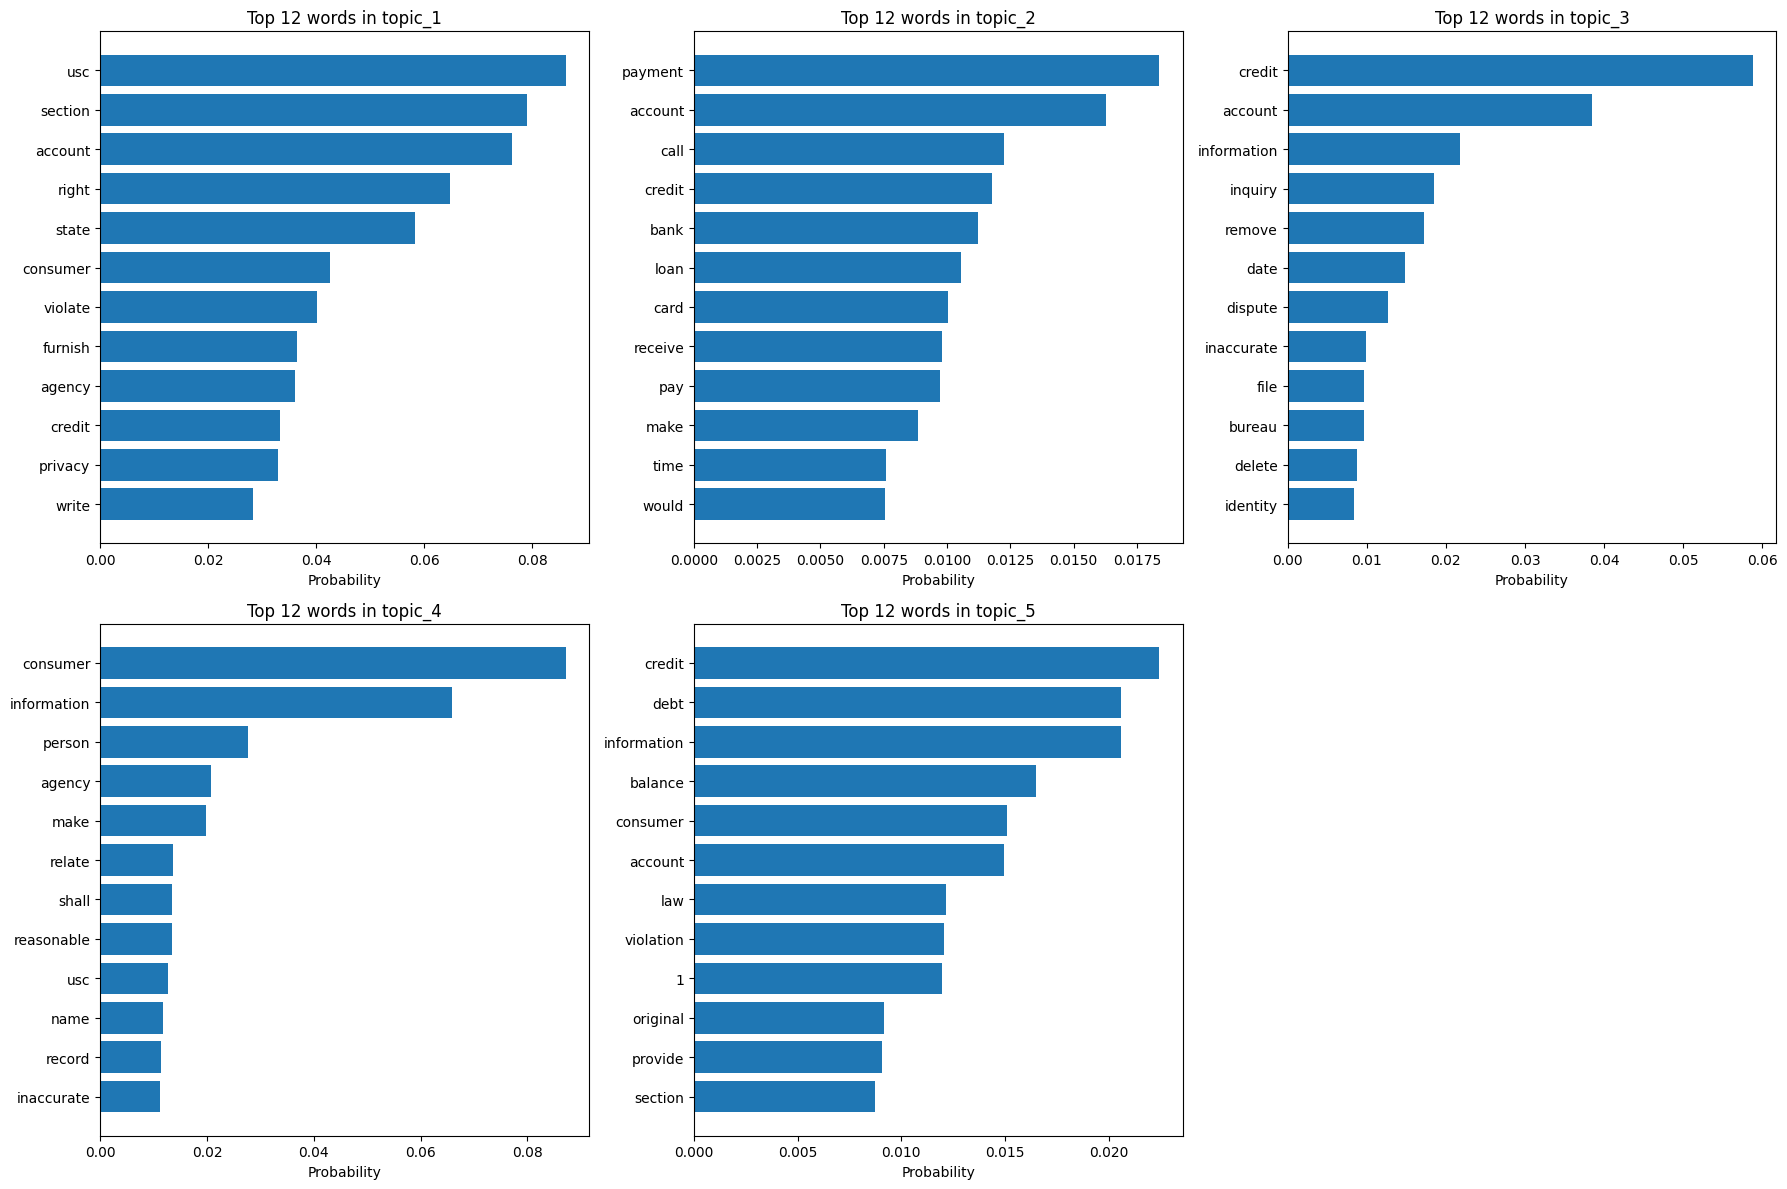

In [ ]:
import ast
import matplotlib.pyplot as plt

def parse_topic_string(topic_str):
    return ast.literal_eval(topic_str)


topics = {}
for i in range(1, 6):
    topic_str = df[f'topic_{i}'][0]
    topics[f'topic_{i}'] = parse_topic_string(topic_str)


fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()


for i, (topic_name, words_probs) in enumerate(topics.items()):
    words, probs = zip(*words_probs[:12])
    axs[i].barh(words, probs)
    axs[i].set_title(f'Top 12 words in {topic_name}')
    axs[i].invert_yaxis() 
    axs[i].set_xlabel('Probability')


axs[-1].axis('off')

plt.tight_layout()
plt.show()
